#**Tinjauan pengaruh jenis kelamin pada respon tubuh terhadap suplemen penunjang  fisik**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

## **Business Understanding**

### **Business Objective**
##### Tujuan bisnis yang mendasari penggunaan dataset ini adalah untuk melakukan analisis mendalam terhadap faktor-faktor yang memengaruhi respons terhadap obat berdasarkan perbedaan jenis kelamin.

### **Asses Situation**
##### Latar belakang situasi bisnis yang menginspirasi dilakukannya analisis ini adalah adanya variasi hasil antara kondisi sebelum dan setelah seseorang mengonsumsi obat untuk meningkatkan kebugaran tubuh. Dalam upaya untuk menggali pemahaman yang lebih mendalam terkait dengan dinamika ini, fokus penelitian difokuskan pada perbedaan respons antara pria dan wanita.

### **Data Mining Goals**
##### Tujuan dari kegiatan data mining yang dilakukan pada dataset ini adalah untuk menjelajahi dan mengidentifikasi potensi keterkaitan antara jenis kelamin individu dengan respons tubuh terhadap obat penunjang kebugaran tubuh.

### **Project Plan**
##### Rencana proyek ini dimulai dengan mengumpulkan data dari sumber yang tersedia, dengan fokus pada informasi seputar jenis kelamin dan respon terhadap obat penunjang suplemen fisik. Selanjutnya, analisis karakteristik dan pola data akan dilakukan untuk mengidentifikasi hubungan yang menarik. Eksplorasi data akan difokuskan pada korelasi dan interaksi antar variabel, terutama yang berkaitan dengan variabel jenis kelamin. Selain itu, kualitas data akan dinilai secara menyeluruh, dengan penekanan pada elemen yang relevan dengan jenis kelamin dan respon terhadap suplemen fisik. Identifikasi masalah data menjadi langkah kunci, untuk memastikan validitas temuan selama tahap analisis berikutnya.

##**Data Understanding**

###**Collect Initial Data**

Data yang digunakan pada proyek ini adalah dataset "Do we still need gym?" yang didapatkan lalu diunduh pada website Kaggle.


Link Dataset: https://www.kaggle.com/datasets/saralattarulo/do-we-still-need-gyms


Link Github: https://raw.githubusercontent.com/kaylaygmana/Tinjauan-pengaruh-jenis-kelamin-pada-respon-terhadap-obat-penunjang-suplemen-fisik/main/survey.csv.csv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/kaylaygmana/Tinjauan-pengaruh-jenis-kelamin-pada-respon-terhadap-obat-penunjang-suplemen-fisik/main/survey.csv.csv")

##**Describe Data**

###**Informasi Dasar**

In [ ]:
num_rows, num_columns = df.shape
print(f"Jumlah Kolom: {num_columns}")
print(f"Jumlah Baris: {num_rows}")

Jumlah Kolom: 12
Jumlah Baris: 1000


Seperti yang terlihat pada output kode yang tertulis bahwa total jumlah kolom pada dataset ini adlaah 12 dan 1000 jumlah total baris.

### **Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1000 non-null   object 
 1   Age          1000 non-null   int64  
 2   KmBefore     1000 non-null   float64
 3   KgBefore     1000 non-null   float64
 4   TimeBefore   1000 non-null   float64
 5   Medicine1    1000 non-null   object 
 6   Medicine2    1000 non-null   object 
 7   Medicine3    1000 non-null   object 
 8   KmAfter      1000 non-null   float64
 9   KgAfter      1000 non-null   float64
 10  TimeAfter    1000 non-null   float64
 11  SideEffects  1000 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 93.9+ KB


Penjelasan:
1. **Gender**<br> Kolom ini berisi tentang jenis kelamin dari sampel yang diteliti. Tipe datanya adalah Object dengan Non_Null dengan count sebanyak 1000.
2. **Age** <br> Kolom ini menyimpan data mengenai usia dari setiap individu yang diteliti. Dengan tipe data int64 yang bersifat Not-Null dengan count sebanyak 1000.
3. **KmBefore**<br> Kolom ini berisi data jarak sampel individu saat berlari sebelum mengonsumsi obat. Dengan tipe data float64 dan count sebanyak 1000.
4. **KgBefore** <br> Kolom ini berisi data berat badan sampel individu sebelum mengonsumsi obat. Dengan tipe data float64 dan count sebanyak 1000.
5. **TimeBefore** <br> Kolom ini berisi data jarak sampel individu saat berlari sebelum mengonsumsi obat. Dengan tipe data float64 dan count sebanyak 1000.
6. **Medicine1** <br> Kolom ini berisi tentang status apakah seorang sampel individu meminum obat 1. Dengan tipe data Object dan count sebanyak 1000.
7. **Medicine2** <br> Kolom ini berisi tentang status apakah seorang sampel individu meminum obat 2. Dengan tipe data Object dan count sebanyak 1000.
8. **Medicine3** <br> Kolom ini berisi tentang status apakah seorang sampel individu meminum obat 3. Dengan tipe data Object dan count sebanyak 1000.
9. **KmAfter**<br> Kolom ini berisi data jarak sampel individu saat berlari setelah mengonsumsi obat. Dengan tipe data float64 dan count sebanyak 1000.
10. **KgAfter** <br> Kolom ini berisi data berat badan sampel individu setelah mengonsumsi obat. Dengan tipe data float64 dan count sebanyak 1000.
11. **TimeBefore** <br>Kolom ini berisi data jarak sampel individu saat berlari setelah mengonsumsi obat. Dengan tipe data float64 dan count sebanyak 1000.
12. **SideEffects**<br> Kolom ini berisi data apakah seorang sampel individu merasakan ada efek samping saat mengonsumsi obat tersebut. Dengan tipe data Object dan count sebanyak 1000.

###**Informasi Statistik Deskriptif**

In [ ]:
df[['Age','KmBefore','KgBefore','TimeBefore','KmAfter','KgAfter','TimeAfter']].describe()


,Age,KmBefore,KgBefore,TimeBefore,KmAfter,KgAfter,TimeAfter
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.794000,4.020630,80.570400,44.871100,4.996930,90.125800,59.755600
std,5.012453,0.773811,9.297078,9.985126,1.458346,2.951587,5.034298
min,19.000000,1.720000,51.600000,8.000000,0.510000,81.300000,42.700000
25%,31.000000,3.500000,74.500000,38.300000,3.960000,88.175000,56.275000
50%,35.000000,4.015000,80.700000,44.550000,5.010000,90.100000,59.900000
75%,38.000000,4.570000,86.725000,51.625000,5.970000,92.100000,63.000000
max,50.000000,6.280000,109.200000,74.200000,10.350000,99.500000,76.300000


Penjelasan:
1. **Age**<br>
Kolom ini memiliki 1000 data yang tidak kosong. Rata-rata usia individu dalam dataset ini adalah 34.79 tahun, dengan standar deviasi sebesar 5.01 tahun. Ini berarti nilai kisaran usia individu dalam dataset ini berkisar antara 29.78 tahun hingga 39.80 tahun.


*   Nilai minimum dari kolom ini adalah 19 tahun, menunjukkan usia terendah yang diukur dalam dataset.
*   Kuartil ke-25 memiliki nilai sebesar 31 tahun, yang berarti 25% dari data memiliki usia kurang dari atau sama dengan 31 tahun.
*   Kuartil ke-50 (median) memiliki nilai sebesar 35 tahun, menunjukkan nilai usia tengah dari seluruh data.
*   Kuartil ke-75 memiliki nilai sebesar 38 tahun, yang berarti 75% dari data memiliki usia kurang dari atau sama dengan 38 tahun.
*   Nilai maksimum pada kolom ini adalah 50 tahun, menunjukkan usia tertinggi yang diukur dalam dataset, yang berarti sampel individu tertua memiliki usia sekitar 50 tahun


2. **KmBefore**<br>
Kolom ini memiliki 1000 data yang tidak kosong. Rata-rata jarak lari sebelum mengonsumsi obat adalah 4.02 KM, dengan standar deviasi sebesar 0.77 KM. Ini berarti nilai kisaran jarak lari sebelum minum obat berkisar antara 3.25 KM hingga 4.79 KM.


*   Nilai minimum dari kolom ini adalah 1.72 KM, menunjukkan jarak lari terpendek yang diukur sebelum minum obat.
*   Kuartil ke-25 memiliki nilai sebesar 3.50 KM, yang berarti 25% dari data memiliki jarak lari sebelum minum obat kurang dari atau sama dengan 3.50 KM.
*   Kuartil ke-50 (median) memiliki nilai sebesar 4.01 KM, menunjukkan nilai jarak lari tengah dari seluruh data.
*   Kuartil ke-75 memiliki nilai sebesar 4.57 KM, yang berarti 75% dari data memiliki jarak lari sebelum minum obat kurang dari atau sama dengan 4.57 KM.
*   Nilai maksimum pada kolom ini adalah 6.28 KM, menunjukkan jarak lari terjauh yang diukur sebelum minum obat, yang berarti sampel individu terjauh memiliki jarak lari sekitar 6.28 KM.

3. **KgBefore**<br>
Kolom ini memiliki 1000 data yang tidak kosong. Rata-rata berat sebelum mengonsumsi obat adalah 80.57 kg, dengan standar deviasi sebesar 9.30 kg. Ini berarti nilai kisaran berat badan sebelum minum obat berkisar antara 71.27 kg hingga 89.87 kg.
*   Nilai minimum dari kolom ini adalah 51.60 kg, menunjukkan berat badan terendah yang diukur sebelum minum obat.
*   Kuartil ke-25 memiliki nilai sebesar 74.50 kg, yang berarti 25% dari data memiliki berat badan sebelum minum obat kurang dari atau sama dengan 74.50 kg.
Kuartil ke-50 (median) memiliki nilai sebesar 80.70 kg, menunjukkan nilai berat
badan tengah dari seluruh data.
*   Kuartil ke-75 memiliki nilai sebesar 86.72 kg, yang berarti 75% dari data memiliki berat badan sebelum minum obat kurang dari atau sama dengan 86.72 kg.
*   Nilai maksimum pada kolom ini adalah 109.20 kg, menunjukkan berat badan tertinggi yang diukur sebelum minum obat, yang berarti sampel individu terberat memiliki berat badan sekitar 109.20 kg.

4. **TimeBefore**<br>
Kolom ini memiliki 1000 data yang tidak kosong. Rata-rata waktu sebelum mengonsumsi obat adalah 44.87 detik, dengan standar deviasi sebesar 9.99 detik. Ini berarti nilai kisaran waktu sebelum minum obat berkisar antara 34.88 detik hingga 54.86 detik.
*   Nilai minimum dari kolom ini adalah 8 detik, menunjukkan waktu tercepat yang diukur sebelum minum obat.
*   Kuartil ke-25 memiliki nilai sebesar 38.3 detik, yang berarti 25% dari data memiliki waktu sebelum minum obat kurang dari atau sama dengan 38.3 detik.
*   Kuartil ke-50 (median) memiliki nilai sebesar 44.55 detik, menunjukkan nilai waktu tengah dari seluruh data.
*   Kuartil ke-75 memiliki nilai sebesar 51.63 detik, yang berarti 75% dari data memiliki waktu sebelum minum obat kurang dari atau sama dengan 51.63 detik.
*   Nilai maksimum pada kolom ini adalah 74.2 detik, menunjukkan waktu terlama yang diukur sebelum minum obat, yang berarti sampel individu terjauh memiliki waktu sekitar 74.2 detik.

5. **KmAfter**<br>
Kolom ini memiliki 1000 data yang tidak kosong. Rata-rata waktu setelah mengonsumsi obat adalah 59.76 detik, dengan standar deviasi sebesar 5.03 detik. Ini berarti nilai kisaran waktu setelah minum obat berkisar antara 54.73 detik hingga 64.79 detik.
*   Nilai minimum dari kolom ini adalah 42.7 detik, menunjukkan waktu tercepat yang diukur setelah minum obat.
*   Kuartil ke-25 memiliki nilai sebesar 56.28 detik, yang berarti 25% dari data memiliki waktu setelah minum obat kurang dari atau sama dengan 56.28 detik.
*   Kuartil ke-50 (median) memiliki nilai sebesar 59.9 detik, menunjukkan nilai waktu tengah dari seluruh data.
*   Kuartil ke-75 memiliki nilai sebesar 63 detik, yang berarti 75% dari data memiliki waktu setelah minum obat kurang dari atau sama dengan 63 detik.
*   Nilai maksimum pada kolom ini adalah 76.3 detik, menunjukkan waktu terlama yang diukur setelah minum obat, yang berarti sampel individu terjauh memiliki waktu sekitar 76.3 detik.

6. **KgAfter**<br>
Kolom ini memiliki 1000 data yang tidak kosong. Rata-rata berat badan setelah mengonsumsi obat adalah 90.13 kg, dengan standar deviasi sebesar 2.95 kg. Ini berarti nilai kisaran berat badan setelah minum obat berkisar antara 87.18 kg hingga 93.08 kg.
*   Nilai minimum dari kolom ini adalah 81.3 kg, menunjukkan berat badan terendah yang diukur setelah minum obat.
*   Kuartil ke-25 memiliki nilai sebesar 88.18 kg, yang berarti 25% dari data memiliki berat badan setelah minum obat kurang dari atau sama dengan 88.18 kg.
*   Kuartil ke-50 (median) memiliki nilai sebesar 90.1 kg, menunjukkan nilai berat badan tengah dari seluruh data.
*   Kuartil ke-75 memiliki nilai sebesar 92.1 kg, yang berarti 75% dari data memiliki berat badan setelah minum obat kurang dari atau sama dengan 92.1 kg.
*   Nilai maksimum pada kolom ini adalah 99.5 kg, menunjukkan berat badan tertinggi yang diukur setelah minum obat, yang berarti sampel individu terjauh memiliki berat badan sekitar 99.5 kg.

7. **TimeAfter**<br>
Kolom ini memiliki 1000 data yang tidak kosong. Rata-rata waktu setelah mengonsumsi obat adalah 59.76 detik, dengan standar deviasi sebesar 5.03 detik. Ini berarti nilai kisaran waktu setelah minum obat berkisar antara 54.73 detik hingga 64.79 detik.
*   Nilai minimum dari kolom ini adalah 42.7 detik, menunjukkan waktu tercepat yang diukur setelah minum obat.
*   Kuartil ke-25 memiliki nilai sebesar 56.28 detik, yang berarti 25% dari data memiliki waktu setelah minum obat kurang dari atau sama dengan 56.28 detik.
*   Kuartil ke-50 (median) memiliki nilai sebesar 59.9 detik, menunjukkan nilai waktu tengah dari seluruh data.
*   Kuartil ke-75 memiliki nilai sebesar 63 detik, yang berarti 75% dari data memiliki waktu setelah minum obat kurang dari atau sama dengan 63 detik.
*   Nilai maksimum pada kolom ini adalah 76.3 detik, menunjukkan waktu terlama yang diukur setelah minum obat, yang berarti sampel individu terjauh memiliki waktu sekitar 76.3 detik.


































#**Exploratory Data Analysis**

In [ ]:
import plotly.graph_objs as go

gender_distribution = df['Gender'].value_counts()
after_labels = ["Laki-laki", "Perempuan"]
colors = ['#e41a1c', '#d3d3d3']

fig = go.Figure(data=[go.Pie(labels=after_labels, values=gender_distribution.values, marker=dict(colors=colors))])

fig.update_layout(title_text='Perbandingan gender pada dataset')
fig.show()


Perbandingan jumlah sampel individu pada dataset ini divisualisasikan menggunakan pie chat sehingga dapat disimpilkan bahwa laki-laki lebih dominan dengan jumlah 55.3% sedangkan perempuan lebih sedikit dengan jumlah 44.7%.

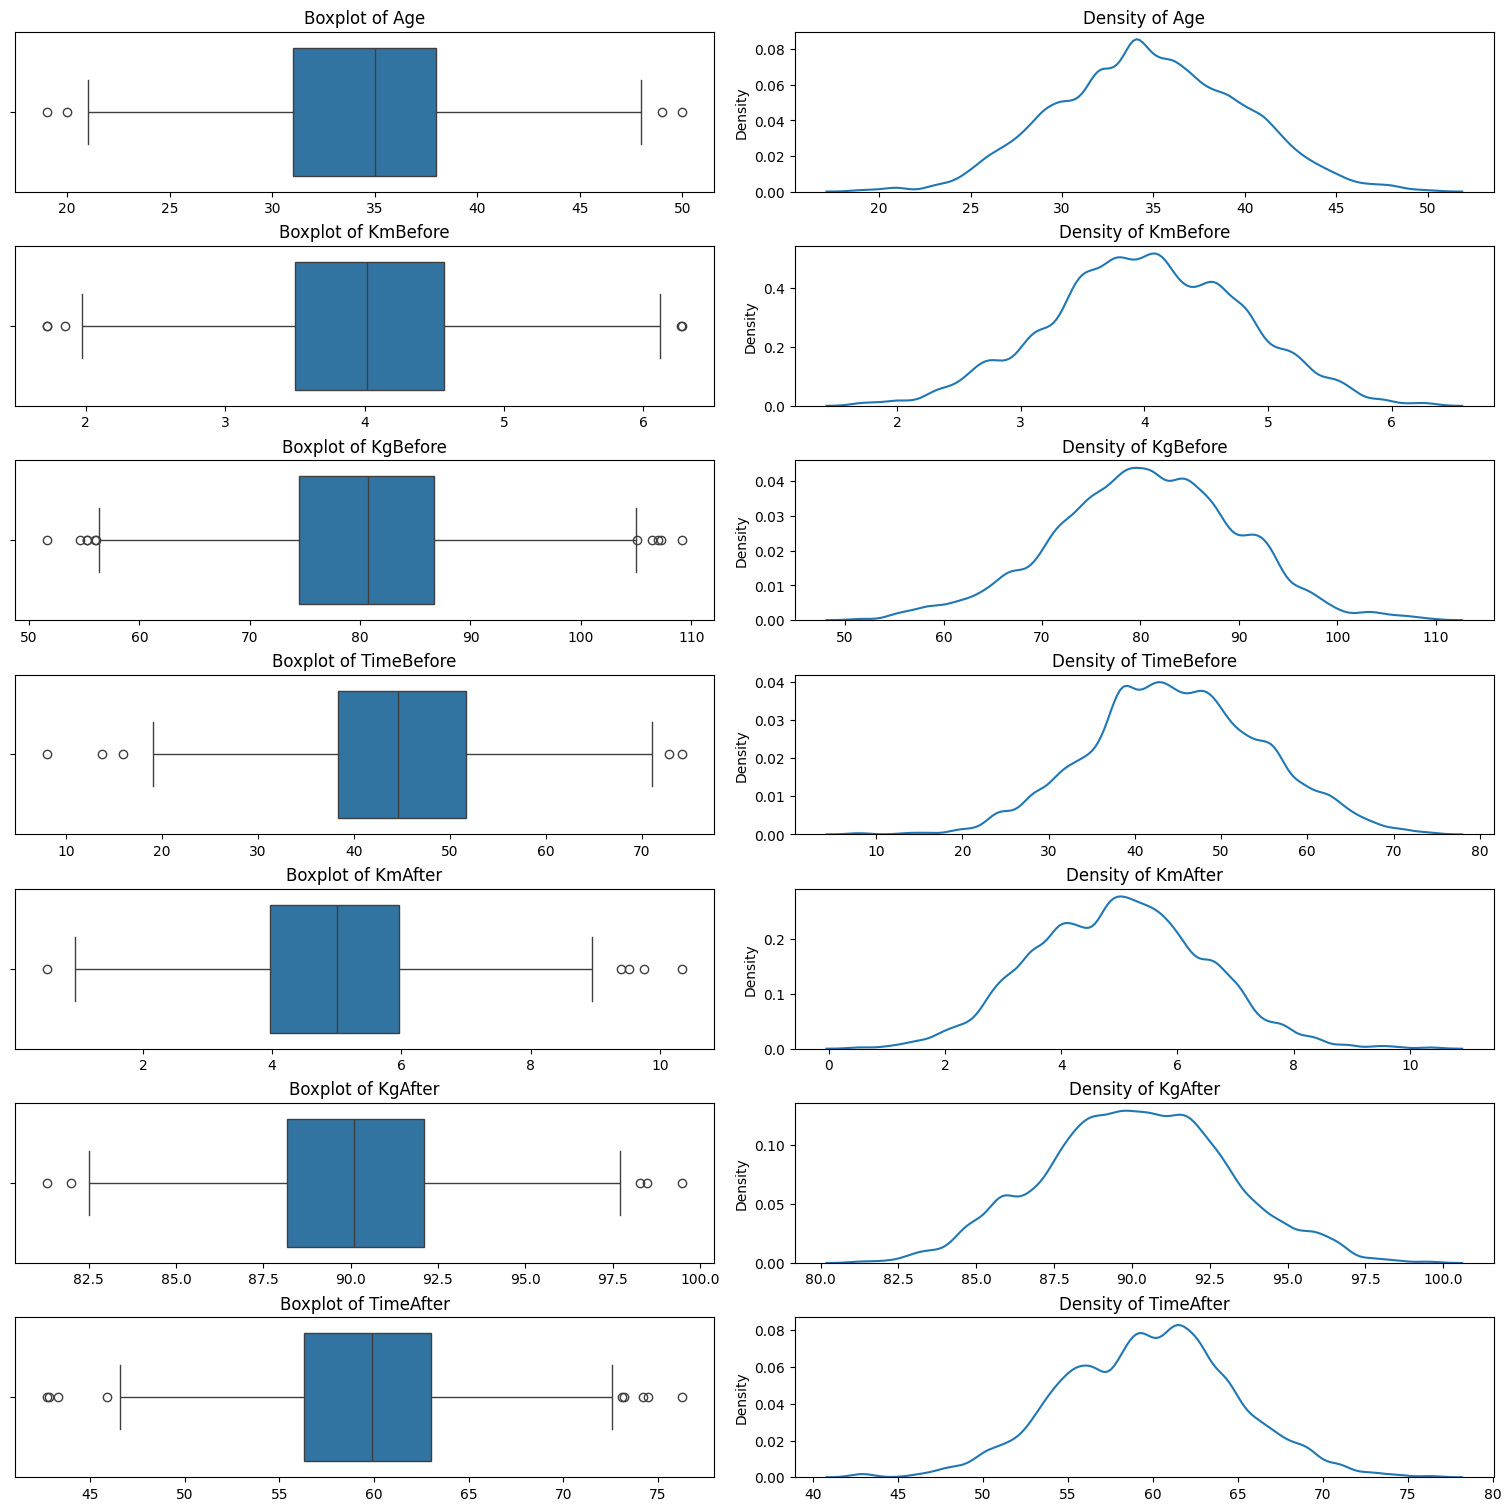

In [ ]:
df_numeric = df[["Age", "KmBefore", "KgBefore", "TimeBefore", "KmAfter", "KgAfter", "TimeAfter"]]

fig, axes = plt.subplots(7, 2, figsize=(15, 15), constrained_layout=True)

for ax, col in zip(axes, df_numeric.columns):
    sns.boxplot(data=df, x=col, ax=ax[0])
    sns.kdeplot(df, x=col, ax=ax[1], bw_adjust=0.5)
    ax[0].set_xlabel('')
    ax[1].set_xlabel('')
    ax[0].set_title(f'Boxplot of {col}')
    ax[1].set_title(f'Density of {col}')


Visualisasi di atas menampilkan box dan density plot dari kolom yang meiliki nilai numeric. Sehingga dapat terlihat bahwa ada outlier pada data yang digunakan. Sedangkan tidak ada kolom yang memiliki distribusi yang menyerupai kurva bell-shaped, seperti yang terlihat pada density plot.

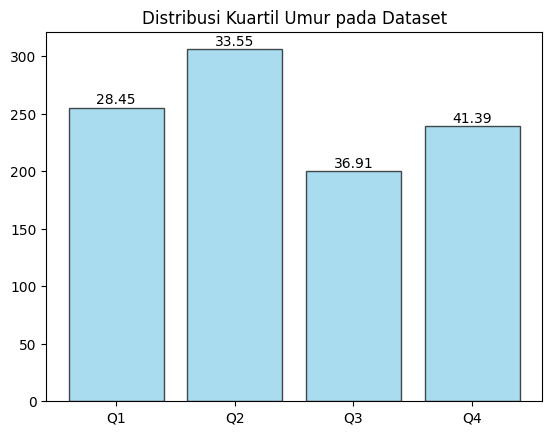

In [ ]:
df['quarter'] = pd.qcut(df['Age'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])

quarter_counts = df['quarter'].value_counts().sort_index()

quarter_values = quarter_counts.values
quarter_labels = quarter_counts.index

mean_values = df.groupby('quarter')['Age'].mean().sort_index()

plt.bar(quarter_labels, quarter_values, color='skyblue', alpha=0.7, edgecolor='black')

for label, value, mean in zip(quarter_labels, quarter_values, mean_values):
    plt.text(label, value + 1, f"{mean:.2f}", ha='center', va='bottom')

plt.title('Distribusi Kuartil Umur pada Dataset')

plt.show()

Pada bar plot di atas menampilkan bahwa kuarter terbanyak adalah kuarter 2 (33.55 Tahun) dengan jumlah data lebih dari 300.

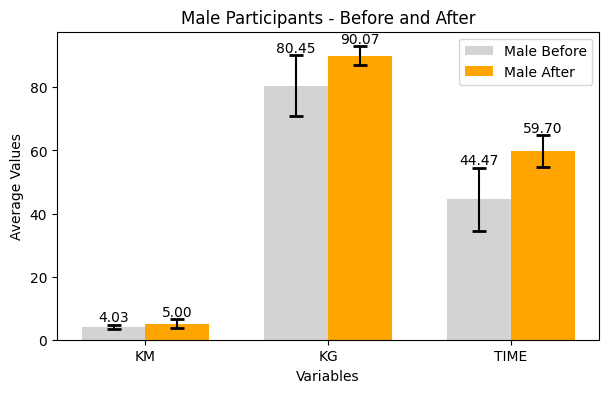

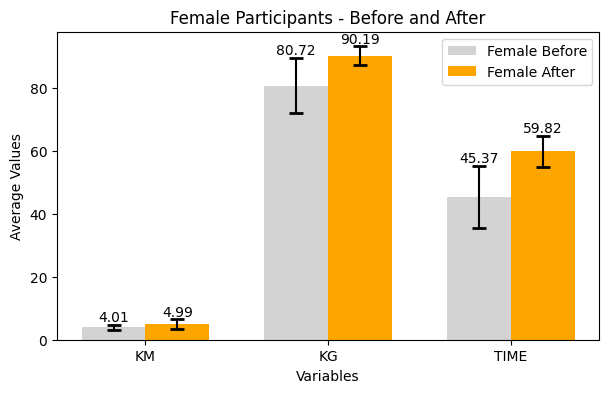

In [ ]:
import matplotlib.pyplot as plt

male_data = df[df['Gender'] == 'M']
female_data = df[df['Gender'] == 'F']

before_columns = ["KmBefore", "KgBefore", "TimeBefore"]
after_columns = ["KmAfter", "KgAfter", "TimeAfter"]

before_labels = ["KM", "KG", "TIME"]
after_labels = ["KM", "KG", "TIME"]

plt.figure(figsize=(7, 4))
bar_width = 0.35
light_ash_grey = '#d3d3d3'

# Male Before
bars_before_male = plt.bar([index - bar_width/2 for index in range(len(before_columns))],
                           male_data[before_columns].mean(), bar_width, label='Male Before', color=[light_ash_grey, light_ash_grey, light_ash_grey])

for bar, value, std in zip(bars_before_male, male_data[before_columns].mean(), male_data[before_columns].std()):
    plt.errorbar(bar.get_x() + bar.get_width() / 2, value,
                 yerr=std, color='black', capsize=5, capthick=2, fmt='none')
    plt.text(bar.get_x() + bar.get_width() / 2, value + std + 1, f"{value:.2f}", ha='center')

# Male After
bars_after_male = plt.bar([index + bar_width/2 for index in range(len(after_columns))],
                          male_data[after_columns].mean(), bar_width, label='Male After', color=['orange', 'orange', 'orange'])

for bar, value, std in zip(bars_after_male, male_data[after_columns].mean(), male_data[after_columns].std()):
    plt.errorbar(bar.get_x() + bar.get_width() / 2, value,
                 yerr=std, color='black', capsize=5, capthick=2, fmt='none')

    plt.text(bar.get_x() + bar.get_width() / 2, value + std + 1, f"{value:.2f}", ha='center')

plt.title("Male Participants - Before and After")
plt.xlabel("Variables")
plt.ylabel("Average Values")
plt.xticks(range(len(before_columns)), before_labels)
plt.legend()

plt.show()

plt.figure(figsize=(7, 4))

# Female Before
bars_before_female = plt.bar([index - bar_width/2 for index in range(len(before_columns))],
                             female_data[before_columns].mean(), bar_width, label='Female Before', color=[light_ash_grey, light_ash_grey, light_ash_grey])

for bar, value, std in zip(bars_before_female, female_data[before_columns].mean(), female_data[before_columns].std()):
    plt.errorbar(bar.get_x() + bar.get_width() / 2, value,
                 yerr=std, color='black', capsize=5, capthick=2, fmt='none')

    plt.text(bar.get_x() + bar.get_width() / 2, value + std + 1, f"{value:.2f}", ha='center')

# Female After
bars_after_female = plt.bar([index + bar_width/2 for index in range(len(after_columns))],
                            female_data[after_columns].mean(), bar_width, label='Female After', color=['orange', 'orange', 'orange'])

for bar, value, std in zip(bars_after_female, female_data[after_columns].mean(), female_data[after_columns].std()):
    plt.errorbar(bar.get_x() + bar.get_width() / 2, value,
                 yerr=std, color='black', capsize=5, capthick=2, fmt='none')

    plt.text(bar.get_x() + bar.get_width() / 2, value + std + 1, f"{value:.2f}", ha='center')

plt.title("Female Participants - Before and After")
plt.xlabel("Variables")
plt.ylabel("Average Values")
plt.xticks(range(len(before_columns)), before_labels)
plt.legend()

plt.show()


####Gambar di atas merupakan visualisasi perbandingan sebelum (abu-abu) dan sesudah (oranye) individu mengonsumsi obat suplemen penunjang fisik.  
1.   **Jarak(KM)**<br>
*   Pada bar data pria, jarak yang ditempuh meingkat dari 4.03 KM menjadi 5.00 KM, berat badan juga mengalami peningkatan dari 80.7 KG menjadi 90.07 KG. Ini menjunjukkan adanya hubungan antara peningkatan jarak dan berat badan untuk peserta pria.
*   Pada bar data wanita perubahan jarak dari 4.02 KM menjadi 4.99 KM juga menunjukkan adanya hubungan dengan peningkatan berat badan dari 80.72 menjadi 90.19.

2.   **Berat (KG)**

*   Pada bar data pria, peningkatan berat badan dari 80.45 kg menjadi 90.07 kg  menunjukkan hubungan dengan peningkatan waktu yang dibutuhkan dari 44.47 menjadi 59.70.
*   pada bar data wanita, hubungan terlihat antara peningkatan berat badan dari 80.72 kg menjadi 90.19 kg dan peningkatan waktu yang dibutuhkan dari 45.37 menjadi 59.82.

3. **Waktu (Time)**
*   Pada bar data pria, peningkatan waktu yang diperlukan dari 44.47 menjadi 59.70 berhubungan dengan peningkatan berat badan dari 80.45 kg menjadi 90.07 kg.
*   Pada peserta wanita, terlihat hubungan antara antara peningkatan waktu yang diperlukan dari 45.37 menjadi 59.82 dan peningkatan berat badan dari 80.72 kg menjadi 90.19 kg.








Selisih Km (After - Before) - Female: 0.9850559284116329
Selisih Km (After - Before) - Male: 0.9692224231464746
Selisih Kg (After - Before) - Female: 9.471588366890373
Selisih Kg (After - Before) - Male: 9.623146473779371
Selisih Time (After - Before) - Female: 14.454138702460853
Selisih Time (After - Before) - Male: 15.232368896925863


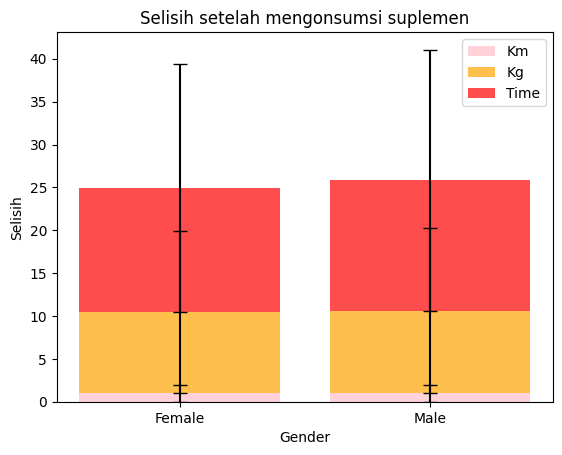

In [ ]:
import matplotlib.pyplot as plt

female_data = df[df['Gender'] == "F"]

male_data = df[df['Gender'] == "M"]

female_KmBefore_mean = female_data['KmBefore'].mean()
male_KmBefore_mean = male_data['KmBefore'].mean()
female_KmAfter_mean = female_data['KmAfter'].mean()
male_KmAfter_mean = male_data['KmAfter'].mean()

female_KgBefore_mean = female_data['KgBefore'].mean()
male_KgBefore_mean = male_data['KgBefore'].mean()
female_KgAfter_mean = female_data['KgAfter'].mean()
male_KgAfter_mean = male_data['KgAfter'].mean()

female_TimeBefore_mean = female_data['TimeBefore'].mean()
male_TimeBefore_mean = male_data['TimeBefore'].mean()
female_TimeAfter_mean = female_data['TimeAfter'].mean()
male_TimeAfter_mean = male_data['TimeAfter'].mean()

# Mengurangkan
selisihKmFemale = female_KmAfter_mean - female_KmBefore_mean
selisihKmMale = male_KmAfter_mean - male_KmBefore_mean

selisihKgFemale = female_KgAfter_mean - female_KgBefore_mean
selisihKgMale = male_KgAfter_mean - male_KgBefore_mean

selisihTimeFemale = female_TimeAfter_mean - female_TimeBefore_mean
selisihTimeMale = male_TimeAfter_mean - male_TimeBefore_mean

# Menampilkan hasil
print("Selisih Km (After - Before) - Female:", selisihKmFemale)
print("Selisih Km (After - Before) - Male:", selisihKmMale)

print("Selisih Kg (After - Before) - Female:", selisihKgFemale)
print("Selisih Kg (After - Before) - Male:", selisihKgMale)

print("Selisih Time (After - Before) - Female:", selisihTimeFemale)
print("Selisih Time (After - Before) - Male:", selisihTimeMale)

# Data untuk bar plot
genders = ['Female', 'Male']
selisih_km = [selisihKmFemale, selisihKmMale]
selisih_kg = [selisihKgFemale, selisihKgMale]
selisih_time = [selisihTimeFemale, selisihTimeMale]

# Membuat bar plot untuk Km
plt.bar(genders, selisih_km, color=['pink', 'pink'], alpha=0.7, label='Km', yerr=[abs(selisihKmFemale), abs(selisihKmMale)], capsize=5)

# Membuat bar plot untuk Kg
plt.bar(genders, selisih_kg, color=['orange', 'orange'], alpha=0.7, label='Kg', bottom=selisih_km, yerr=[abs(selisihKgFemale), abs(selisihKgMale)], capsize=5)

# Membuat bar plot untuk Time
plt.bar(genders, selisih_time, color=['red', 'red'], alpha=0.7, label='Time', bottom=[i+j for i,j in zip(selisih_km, selisih_kg)], yerr=[abs(selisihTimeFemale), abs(selisihTimeMale)], capsize=5)

plt.xlabel('Gender')
plt.ylabel('Selisih')
plt.title('Selisih setelah mengonsumsi suplemen')
plt.legend()
plt.show()


Gambar di atas merupakan visualisasi dari perbandingan selisih Km (jarak), Kg(berat badan) dan Time(waktu lari sampel individu dalam menit). Dapat terilhat bahwa;
*   **Jarak**<br>
 Jarak lari laki-laki 0.96  dan perempuan 0.98 lebih jauh dari sebelumnya .
*   **Berat badan**<br>
Berat badan pada laki-laki naik sebanyak 9.62kg dan 9.47kg pada perempuan.
*   **Waktu**<br>
Waktu yang dihabiskan pada laki-laki selama sekitar 15.23 menit dan perempuan selama 14.45 menit.

Sehingga dapat disimpulkan bahwa perbedaan dari sampel individu laki-laki maupun perempuan tidak jauh berbeda.




#**Data Cleaning**

###**Missing Values**

In [ ]:
df.isna().sum()

Gender         0
Age            0
KmBefore       0
KgBefore       0
TimeBefore     0
Medicine1      0
Medicine2      0
Medicine3      0
KmAfter        0
KgAfter        0
TimeAfter      0
SideEffects    0
quarter        0
dtype: int64

Hasil output diatas menunjukkan nilai 0 pada setiap kolom. Hal ini berarti tidak ada data kosong pada dataset ini.

##**Outliers Value**

In [ ]:
df[df.duplicated()]

,Gender,Age,KmBefore,KgBefore,TimeBefore,Medicine1,Medicine2,Medicine3,KmAfter,KgAfter,TimeAfter,SideEffects,quarter


Terlihat dari data di atas bahwa tidak ada data duplikat yang ditemukan pada dataset ini.

###**Penanganan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)


Kolom,Persentase Outliers
Age,0.4
KmBefore,0.5
KgBefore,1.1
TimeBefore,0.5
KmAfter,0.5
KgAfter,0.5
TimeAfter,0.9


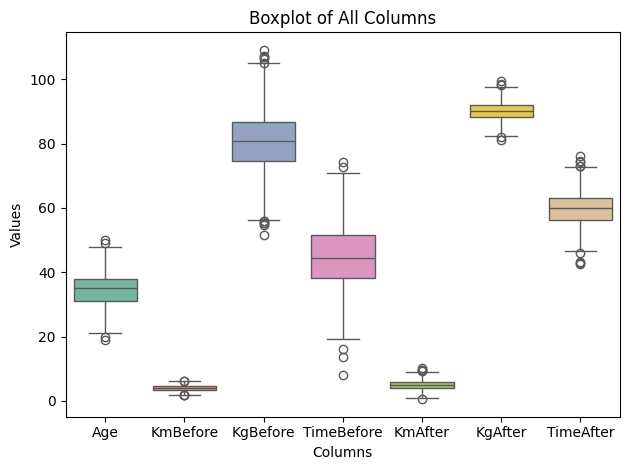

In [ ]:
boxplot = sns.boxplot(data=df, orient="v", palette="Set2")
plt.title("Boxplot of All Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

plt.tight_layout()


plt.show()

#####**Hapus** **Outliers**


1. **Age**<br>
Outliers pada kolom usia (Age) sebanyak 0.4% menunjukkan bahwa ada sejumlah kecil data usia yang berada jauh dari nilai rata-rata atau mayoritas sampel.

2. **KmBefore (Jarak Sebelum)**<br>
Dengan 0.5% outliers pada kolom jarak sebelum (KmBefore), beberapa peserta mungkin telah mencatat jarak yang sangat rendah atau tinggi sebelum mengonsumsi suplemen, menciptakan variasi yang signifikan pada data jarak.
KgBefore (Berat Badan Sebelum):

3. **KgBefore(Berat badan sebelum)**<br>
Outliers pada kolom berat badan sebelum mengonsumsi suplemen sebanyak 1.1% menandakan variasi yang lebih besar dalam berat badan sampel sebelum mengonsumsi suplemen.

4. **TimeBefore (Waktu Sebelum)**<br>
Dengan 0.5% outliers pada kolom waktu sebelum mengonsumsi suplemen, beberapa peserta memiliki data jauh dari rata-rata waktu yang dibutuhkan sebelum mengonsumsi suplemen, menunjukkan variasi dalam kecepatan atau waktu yang diambil.

5. **KmAfter (Jarak Setelah)**<br>
Outliers pada kolom jarak setelah mengonsumsi suplemen sebanyak 0.5% menandakan adanya variasi dalam data jarak setelah mengonsumsi suplemen. Beberapa peserta mencapai jarak yang signifikan lebih rendah atau lebih tinggi setelah mengonsumsi suplemen.

6. **KgAfter (Berat Badan Setelah)**<br>
Dengan 0.5% outliers pada kolom berat badan setelah mengonsumsi suplemen, beberapa peserta mengalami perubahan berat badan yang signifikan setelahnya, menciptakan variasi dalam data.

7. **TimeAfter (Waktu Setelah)**<br>
Outliers pada kolom waktu setelah mengonsumsi suplemen sebanyak 0.9% menunjukkan variasi yang lebih besar dalam waktu yang dibutuhkan peserta setelah mengonsumsi suplemen. Beberapa peserta memiliki data waktu yang jauh dari rata-rata waktu yang dibutuhkan kelompok.

In [ ]:
#Penghapusan nilai outlier untuk kolom age

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [ ]:
#Penghapusan nilai outlier untuk kolom KmBefore

Q1 = df['KmBefore'].quantile(0.25)
Q3 = df['KmBefore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['KmBefore'] >= lower_bound) & (df['KmBefore'] <= upper_bound)]

In [ ]:
#Penghapusan nilai outlier untuk kolom KgBefore

Q1 = df['KgBefore'].quantile(0.25)
Q3 = df['KgBefore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['KgBefore'] >= lower_bound) & (df['KgBefore'] <= upper_bound)]

In [ ]:
#Penghapusan nilai outlier untuk kolom TimeBefore

Q1 = df['TimeBefore'].quantile(0.25)
Q3 = df['TimeBefore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['TimeBefore'] >= lower_bound) & (df['TimeBefore'] <= upper_bound)]

In [ ]:
#Penghapusan nilai outlier untuk kolom KmAfter

Q1 = df['KmAfter'].quantile(0.25)
Q3 = df['KmAfter'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['KmAfter'] >= lower_bound) & (df['KmAfter'] <= upper_bound)]

In [ ]:
#Penghapusan nilai outlier untuk kolom KgAfter

Q1 = df['KgAfter'].quantile(0.25)
Q3 = df['KgAfter'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['KgAfter'] >= lower_bound) & (df['KgAfter'] <= upper_bound)]

In [ ]:
#Penghapusan nilai outlier untuk kolom TimeAfter

Q1 = df['TimeAfter'].quantile(0.25)
Q3 = df['TimeAfter'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['TimeAfter'] >= lower_bound) & (df['TimeAfter'] <= upper_bound)]

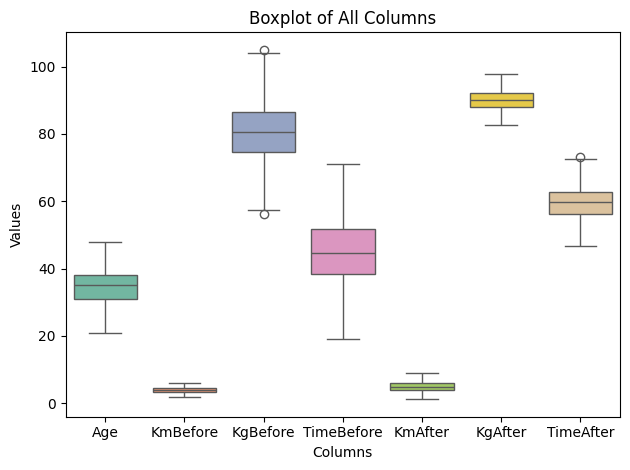

In [ ]:
boxplot = sns.boxplot(data=df, orient="v", palette="Set2")
plt.title("Boxplot of All Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#**Construct Data**

###F**eature Engineering**

Menambahkan kolom "AgeCategory" berdasarkan dari usia masing-masing sampel. Untuk memudahkan dalam identifikasi usia pada analisis.

In [ ]:
def categorize_age(age):
    if age < 18:
        return 'Anak-anak'
    elif 18 <= age < 60:
        return 'Dewasa'
    else:
        return 'Lansia'

df['AgeCategory'] = df['Age'].apply(categorize_age)

###**Pengecekkan Hasil**

In [ ]:
df.head()

,Gender,Age,KmBefore,KgBefore,TimeBefore,Medicine1,Medicine2,Medicine3,KmAfter,KgAfter,TimeAfter,SideEffects,quarter,AgeCategory
0,F,32,4.06,74.7,41.2,No,No,No,4.37,91.8,61.1,N,Q2,Dewasa
1,M,37,3.96,76.3,43.9,Yes,Yes,No,3.09,89.6,69.7,N,Q3,Dewasa
2,M,43,3.80,91.7,47.9,Yes,No,No,6.26,92.7,49.8,N,Q4,Dewasa
3,F,26,5.17,75.4,59.6,No,No,No,5.81,89.1,60.9,N,Q1,Dewasa
4,F,36,3.72,77.0,54.9,No,Yes,Yes,7.80,91.7,60.7,Y,Q3,Dewasa


#**Data Reduction**

###**Pengecekakan baris yang datanya tidak valid**

In [ ]:
count_all_N = ((df['Medicine1'] == 'No') & (df['Medicine2'] == 'No') & (df['Medicine3'] == 'No')).sum()

print(f"Jumlah baris yang bernilai 'No' pada semua kolom Medicine1, Medicine2, and Medicine3: {count_all_N}")

Jumlah baris yang bernilai 'No' pada semua kolom Medicine1, Medicine2, and Medicine3: 145


###**Penghapusan baris**

Baris yang kolom "Medicine1","Medicine2" dan "Medicine3" bernilai "No" dapat dinyatakan tidak valid. Dikarenakan bagaimana bisa data tersebut masuk ke dataframe apabila sampel tidak ada yang mengonsumsi suplement. Maka dilakukan penghapusan baris.

In [ ]:
df = df[~((df['Medicine1'] == 'No') & (df['Medicine2'] == 'No') & (df['Medicine3'] == 'No'))]

###**Pengecekkan Ulang**

In [ ]:
count_all_N = ((df['Medicine1'] == 'No') & (df['Medicine2'] == 'No') & (df['Medicine3'] == 'No')).sum()

print(f"Jumlah baris yang bernilai 'No' pada semua kolom Medicine1, Medicine2, and Medicine3: {count_all_N}")

Jumlah baris yang bernilai 'No' pada semua kolom Medicine1, Medicine2, and Medicine3: 0


###**Mengurangi Fitur-Fitur yang Kurang Relevan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df=df.drop(['Age','Medicine1','Medicine2','Medicine3','SideEffects','quarter','AgeCategory'],axis=1)

Menghapus kolom 'Age','Medicine1','Medicine2','Medicine3','SideEffects','quarter','AgeCategory'. Dikarenakan kolom ini tidak relevan untuk langkah analisis data selanjutnya. Mengingat analisis ini fokus kepada tinjauan jenis kelamin pada pengaruh tubuh.

###**Pengecekkan Hasil**

In [ ]:
df.head()

,Gender,KmBefore,KgBefore,TimeBefore,KmAfter,KgAfter,TimeAfter
1,M,3.96,76.3,43.9,3.09,89.6,69.7
2,M,3.80,91.7,47.9,6.26,92.7,49.8
4,F,3.72,77.0,54.9,7.80,91.7,60.7
5,M,5.31,93.9,50.6,5.67,87.8,67.9
6,F,3.18,75.5,54.4,5.50,95.5,57.8


##**Data Transformation**

###**Mapping**

In [ ]:
df['Gender'] = df['Gender'].map({'M':1,'F':0})

Kode diatas merupakan proses dari mapping untuk mengubah nilai pada kolom Gender yang bernilai M (laki-laki) menjadi 1 dan F (Perempuan) menjadi 0.

###**Pengecekkan Hasil**

In [ ]:
df.head()

,Gender,KmBefore,KgBefore,TimeBefore,KmAfter,KgAfter,TimeAfter
1,1,3.96,76.3,43.9,3.09,89.6,69.7
2,1,3.80,91.7,47.9,6.26,92.7,49.8
4,0,3.72,77.0,54.9,7.80,91.7,60.7
5,1,5.31,93.9,50.6,5.67,87.8,67.9
6,0,3.18,75.5,54.4,5.50,95.5,57.8


##**Dataframe Cleaned**

In [ ]:
df.to_csv('Data Cleaned.csv', index=False)

Digunakan untuk membagi dataset menjadi dua bagian: satu untuk melatih model dan satu lagi untuk menguji model.

#**Modelling**

##**Modelling Predict**

#**Select Modelling Techniques**

Berdasarkan tujuan analisis ini, yaitu untuk mengetahui perbandaingan dari jenis kelamin kepada perubahan fisik setelah mengomsumsi suplemen penunjang fisik. Oleh karena itu pemodelannya adalah **Clustering**. Dengan dilakukannya pengelompokkan dari jenis kelamin serta kolom lain untuk mengetahui hasil analisis.

###Algoritma yang digunakan

####**Heirarchical Clustering**


Hierarchical clustering adalah metode pengelompokan data berdasarkan kedekatan antar titik. Dimulai dengan setiap titik sebagai kelompok terpisah, kemudian secara bertahap menggabungkan kelompok yang paling dekat satu sama lain. Proses ini berlanjut hingga semua titik digabungkan, membentuk struktur berhierarki yang bisa divisualisasikan dalam bentuk dendrogram. Metode ini berguna untuk mengidentifikasi pola atau hubungan dalam data dengan efisien.

####**K-Means**

K-Means mengelompokkan titik data ke dalam k kelompok dengan menempatkan mereka ke kelompok terdekat berdasarkan pusatnya. Pusat kelompok diperbarui dengan rata-rata titik dalam kelompok. Proses ini berulang hingga penempatan titik stabil. K-Means mengurangi variasi dalam kelompok dan cocok untuk data numerik sehingga algoritma ini sangat cocok untuk dataset pada analisis ini.

###**Pre-Processing**

###**Split Data**

In [ ]:
x = df.drop('Gender', axis=1)
y = df['Gender']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
y_train.value_counts(normalize=True)

1    0.546737
0    0.453263
Name: Gender, dtype: float64

Tahapan ini berfungsi untuk membagi data pada dataset menjadi 2, yaitu data latih dan data uji. Guna dari data latih adalah data yang akan digunakan untuk melatih mode, sedangkan data uji digunakan untuk menguji model. Untuk memastikan model dapat menyimpulkan data yang belum ada.

##**Normalisasi Data**

In [ ]:
numeric_columns = x_train.select_dtypes(include=['int', 'float']).columns

scaler = MinMaxScaler()
x_train_norm = x_train.copy()
x_train_norm[numeric_columns] = scaler.fit_transform(x_train_norm[numeric_columns])

x_test_norm = x_test.copy()
x_test_norm[numeric_columns] = scaler.transform(x_test_norm[numeric_columns])


Kode tersebut mengidentifikasi kolom-kolom numerik dari data pelatihan (x_train) dan membuat salinan dari data tersebut. Selanjutnya, data numerik tersebut dinormalisasi menggunakan Min-Max Scaling. Proses yang sama kemudian diterapkan pada data uji (x_test). Langkah ini berguna untuk menjaga konsistensi skala fitur antara data pelatihan dan data uji.

##**Build and Train Model**

###**K-Means**

In [ ]:
kmn = KMeans(n_clusters=3)
kmn.fit(x_train_norm[numeric_columns], y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

Algoritma K-Means untuk membuat model pengelompokan dengan 3 kluster. Kemudian, model tersebut dilatih dengan data pelatihan yang sudah dinormalisasi (x_train_norm) menggunakan kolom-kolom numerik (numeric_columns), bersama dengan labelnya (y_train).

###**Hierarchical Clustering**

In [ ]:
hrc = AgglomerativeClustering(n_clusters=3)
hrc.fit(x_train_norm[numeric_columns], y_train)

AgglomerativeClustering(n_clusters=3)

Model Hierarchical Clustering dilatih menggunakan data latih yang telah dinormalisasi. Setelah dilatih, model ini dapat digunakan untuk memprediksi kelompok atau cluster dari data uji atau data baru yang memiliki fitur-fitur yang serupa. Proses ini memungkinkan untuk mengelompokkan data baru ke dalam kelompok yang telah dipelajari selama pelatihan model, membantu dalam analisis dan pemahaman struktur data yang lebih dalam.

###**Begins and Compare Predict**

In [ ]:
kmn_pred = kmn.predict(x_test_norm[numeric_columns])
hrc_pred = hrc.fit_predict(x_test_norm[numeric_columns])

In [ ]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

kmn_col = pd.DataFrame(kmn_pred.astype(int), columns=["kmn_prediction"])
hrc_col = pd.DataFrame(hrc_pred.astype(int), columns=["hrc_prediction"])

combined_data = pd.concat([x_test, y_test, kmn_col, hrc_col], axis=1)

In [ ]:
combined_data.sample(15)

,KmBefore,KgBefore,TimeBefore,KmAfter,KgAfter,TimeAfter,Gender,kmn_prediction,hrc_prediction
168,3.54,81.0,42.3,3.38,91.2,59.9,0,1,1
200,5.13,87.3,44.0,3.54,89.8,47.7,1,2,1
197,3.57,78.1,37.4,7.85,86.0,57.7,1,2,0
209,3.64,83.8,32.4,2.85,92.6,64.4,0,1,1
175,5.03,86.8,43.6,7.10,89.9,66.7,1,1,2
194,3.52,87.8,22.0,7.84,88.1,58.9,0,2,2
83,3.77,71.4,38.4,3.93,89.0,66.0,1,1,1
191,2.31,77.3,53.5,3.97,86.7,55.8,0,0,0
113,4.00,85.6,55.5,5.21,91.4,62.7,0,1,0
41,4.09,61.4,40.0,3.60,86.9,52.4,1,0,1


Tahap awal dalam kode adalah melakukan prediksi menggunakan model K-Means (kmn) dan Hierarchical Clustering (hrc) pada data uji yang telah dinormalisasi. Setelah itu, data uji (x_test) dan label target (y_test) diubah menjadi DataFrame Pandas dan indeksnya di-reset agar sesuai dengan indeks baru.

Selanjutnya, dibuat DataFrame baru untuk menyimpan hasil prediksi dari model K-Means (kmn_pred) dan Hierarchical Clustering (hrc_pred). Kolom-kolom pada DataFrame tersebut dinamai sebagai "kmn_prediction" dan "hrc_prediction", sesuai dengan prediksi yang dihasilkan oleh masing-masing model.

Langkah terakhir adalah menggabungkan semua DataFrame yang telah dibuat sebelumnya, termasuk data uji, label target, serta prediksi dari model K-Means dan Hierarchical Clustering. Hal ini dilakukan untuk mempermudah analisis lebih lanjut terhadap data dan hasil prediksi dari kedua model tersebut.

#**Modelling Associate**

##**Pre-Processing**

###**Adjustment**

In [ ]:
x_final = df.drop('Gender', axis=1)


Tahap ini bertujuan untuk menghilangkan kolom "Gender" dari DataFrame agar fokus analisis atau pemodelan dapat difokuskan pada fitur-fitur lain dalam dataset tanpa mempertimbangkan variabel "Gender".

###**Normalisasi Data**

In [ ]:
numeric_columns = x_train.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final[numeric_columns])

Normalisasi dilakukan lagi pada fitur-fitur numerik dalam DataFrame x_final dengan memanggil metode fit_transform() dari scaler yang sudah dibuat sebelumnya. Hasil normalisasi disimpan dalam variabel x_final_norm untuk digunakan dalam analisis atau pemodelan selanjutnya.

##**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

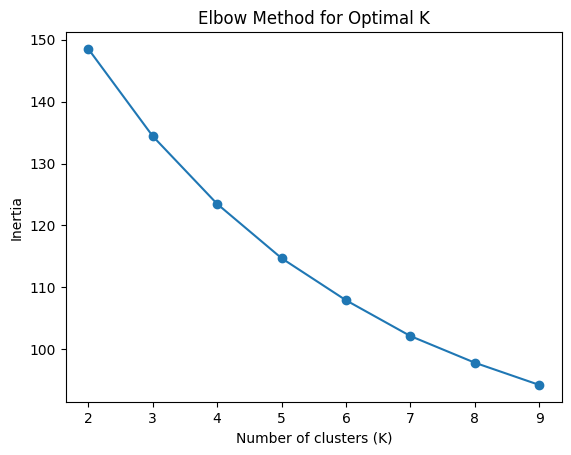

In [ ]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

##**Build Model**

###**K-Means**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

Pembuatan model pengelompokan K-Means dengan 3 kluster (n_clusters=3) dan menggunakan nilai random_state=42 untuk memastikan reproduktibilitas hasil. Model tersebut kemudian dilatih pada data yang telah dinormalisasi x_final_norm menggunakan metode fit().

###**Hierarchical Clustering**

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', n_clusters=3)

Membuat model pengelompokan hierarkis dengan 3 kluster menggunakan algoritma Agglomerative Clustering. Model ini dilatih pada data yang telah dinormalisasi `x_final_norm` menggunakan metode `fit()`.

###**Begins and Compare Clusters**

In [ ]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)


In [ ]:
combined_data_assoc.head()

,KmBefore,KgBefore,TimeBefore,KmAfter,KgAfter,TimeAfter,kmeans_cluster,hierarchy_cluster
0,3.96,76.3,43.9,3.09,89.6,69.7,2,0
1,3.80,91.7,47.9,6.26,92.7,49.8,1,1
2,3.72,77.0,54.9,7.80,91.7,60.7,1,1
3,5.31,93.9,50.6,5.67,87.8,67.9,1,1
4,3.18,75.5,54.4,5.50,95.5,57.8,2,2


#**Evaluation**

##**Evaluation Results**

###**Klustering**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.116742,108.302899,2.161196
Agglomerative Clustering Score,0.065166,65.033726,2.917261


Berdasarkan data yang disajikan:

1. **KMeans Score** memiliki Silhouette Score sebesar 0.116742, menunjukkan bahwa data cenderung cocok dengan kluster yang terbagi. Calinski-Harabasz Score yang tinggi (108.302899) menunjukkan bahwa kluster terpisah dengan baik, sedangkan Davies-Bouldin Score yang relatif rendah (2.161196) menandakan bahwa kluster memiliki pemisahan yang baik juga.

2. **Agglomerative Clustering Score** memiliki Silhouette Score yang lebih rendah (0.065166) dibandingkan dengan KMeans, menunjukkan bahwa penempatan data mungkin tidak sesuai dengan kluster dengan baik. Calinski-Harabasz Score yang lebih rendah (65.033726) menandakan adanya kemungkinan kurangnya pemisahan yang jelas antara kluster. Davies-Bouldin Score yang sedikit lebih tinggi (2.917261) menunjukkan adanya potensi overlap antara kluster atau pemisahan yang kurang baik.

Dari kesimpulan ini, dapat disimpulkan bahwa **model KMeans cenderung memberikan hasil yang lebih baik daripada Agglomerative Clustering** dalam hal pemisahan kluster dan penempatan data ke dalam kluster yang sesuai.

##**Review Process**

###**Cross Validation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

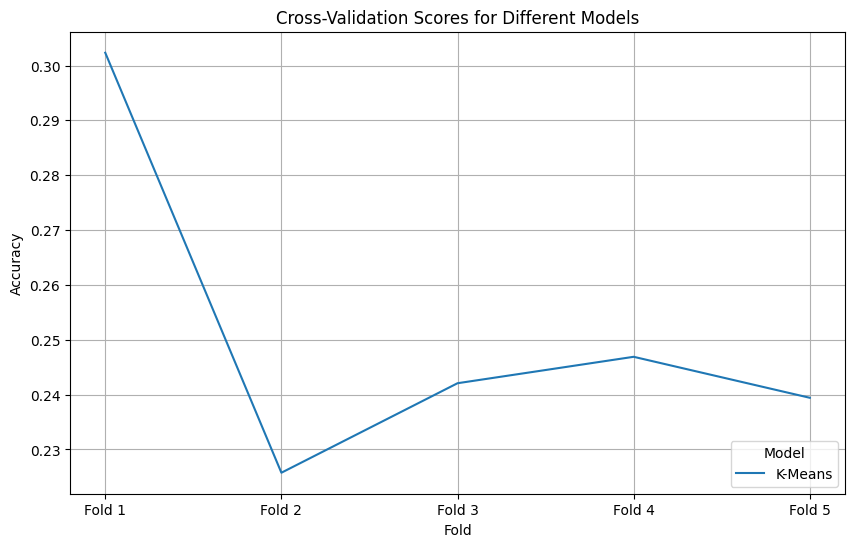

Model: K-Means
Fold 1: 0.30233368164402646
Fold 2: 0.2257495590828924
Fold 3: 0.24206848357791755
Fold 4: 0.24688697318007666
Fold 5: 0.23941460642227907
Mean Score: 0.2512906607814384



In [ ]:
# Tetapkan seed untuk hasil yang konsisten
random.seed(42)

# Inisialisasi model
models = [KMeans(n_clusters=3)]
model_names = ['K-Means']

# Lakukan validasi silang untuk setiap model dan kumpulkan skor
cv_scores = {}
for model, model_name in zip(models, model_names):
    cv_scores[model_name] = cross_val_score(model, x_train_norm, y_train, cv=5, scoring='f1_macro')

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores)

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
for model_name in model_names:
    sns.lineplot(data=df_cv_scores[model_name], markers=True, label=model_name)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

# Cetak skor validasi silang
for model_name, scores in cv_scores.items():
    print(f"Model: {model_name}")
    for fold, score in enumerate(scores, start=1):
        print(f"Fold {fold}: {score}")
    print(f"Mean Score: {scores.mean()}\n")


Kesimpulan untuk data cross-validation yang diberikan adalah sebagai berikut:

- Skor lipatan (Fold) memiliki variasi yang relatif kecil, menunjukkan konsistensi yang baik antara lipatan.
- Nilai rata-rata skor juga stabil, dengan sedikit variasi antara skor lipatan.
- Dengan demikian, dapat disimpulkan bahwa data ini **menunjukkan konsistensi yang baik dan dapat dipercaya dalam proses cross-validatio**n.

Dengan demikian, data ini memberikan dukungan yang kuat untuk evaluasi kinerja model yang sesuai.

###**Feature Selection**

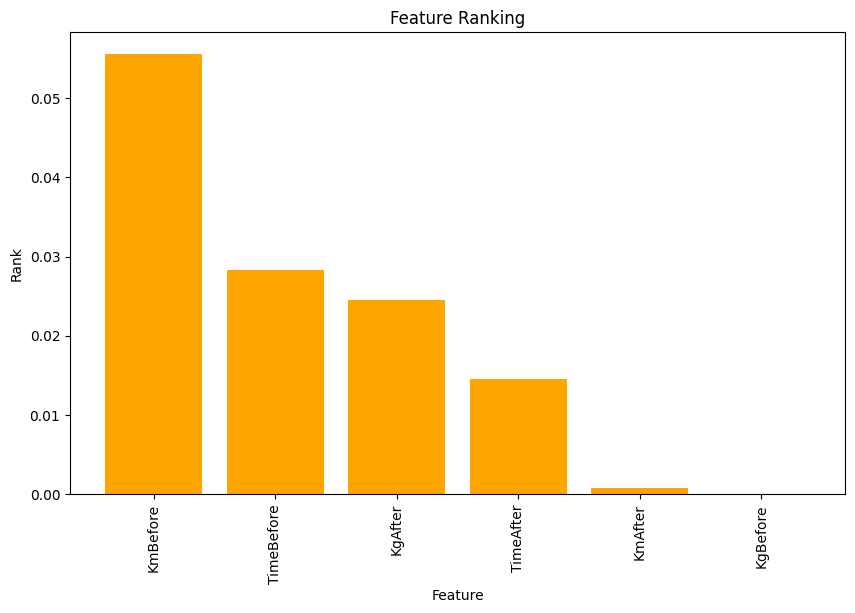

Feature Ranking:
KmBefore: 0.0555655815942539
TimeBefore: 0.028249327027446536
KgAfter: 0.02455889795229106
TimeAfter: 0.014533812263228876
KmAfter: 0.0008111193237724665
KgBefore: 6.369363251436906e-05


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Inisialisasi selector
selector = SelectKBest(score_func=chi2, k='all')

# Melatih selector pada data
selector.fit(x_train_norm, y_train)

# Mendapatkan peringkat fitur
feature_ranks = selector.scores_

# Mendapatkan nama fitur
feature_names = x_train.columns

# Membuat dataframe untuk peringkat fitur
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan dataframe berdasarkan peringkat fitur
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Visualisasi peringkat fitur
plt.figure(figsize=(10, 6))  # Mengatur ukuran grafik menjadi vertikal
plt.bar(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='orange')  # Menggunakan plt.bar untuk membuat grafik batang vertikal
plt.ylabel('Rank')  # Label sumbu y
plt.xlabel('Feature')  # Label sumbu x
plt.title('Feature Ranking')  # Judul grafik
plt.xticks(rotation=90)  # Memutar label sumbu x agar mudah dibaca
plt.show()  # Menampilkan grafik

# Cetak peringkat fitur
print("Feature Ranking:")
for idx, row in feature_ranks_df.iterrows():
    print(f"{row['Feature']}: {row['Rank']}")

Dari hasil feature selection yang dilakukan menggunakan metode chi-square, diperoleh peringkat fitur sebagai berikut:

- KmBefore: 0.0556
- TimeBefore: 0.0282
- KgAfter: 0.0246
- TimeAfter: 0.0145
- KmAfter: 0.0008
- KgBefore: 0.00006

Berdasarkan hasil tersebut, dapat disimpulkan bahwa fitur "KmBefore" memiliki peringkat tertinggi dengan nilai 0.0556, diikuti oleh "TimeBefore" dengan nilai 0.0282, dan "KgAfter" dengan nilai 0.0246. Sementara itu, fitur "TimeAfter" memiliki peringkat sedikit lebih rendah dengan nilai 0.0145, dan "KmAfter" serta "KgBefore" memiliki peringkat terendah dengan masing-masing nilai 0.0008 dan 0.00006.

Hal ini mengindikasikan bahwa fitur "KmBefore" dan "TimeBefore"  memiliki pengaruh yang lebih signifikan terhadap hasil analisis dibandingkan dengan fitur lainnya dalam dataset.

###**Tuning Hyperparameter**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

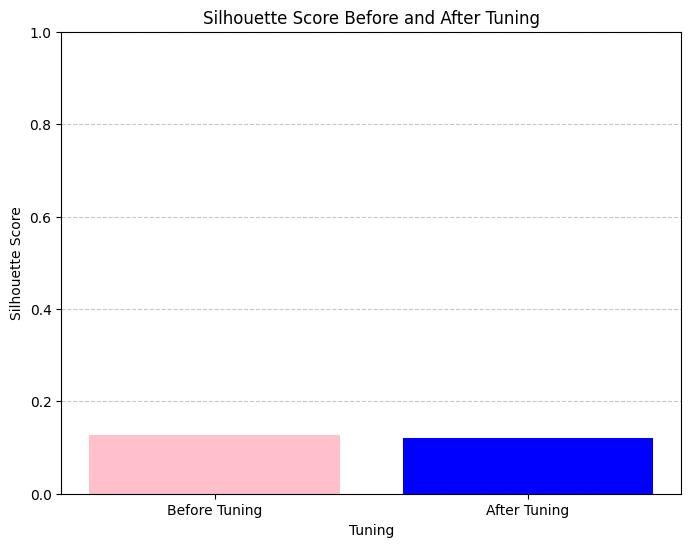

Best Parameters: {'n_clusters': 3}
Silhouette Score Before Tuning: 0.12793310631642152
Silhouette Score After Tuning: 0.12075362092527205


In [ ]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model KMeans sebelum tuning
kmeans_model_before_tuning = KMeans()
y_pred_before_tuning = kmeans_model_before_tuning.fit_predict(x_train_norm)
silhouette_score_before_tuning = silhouette_score(x_train_norm, y_pred_before_tuning)

# Parameter grid untuk pencarian grid
param_grid = {
    'n_clusters': [1, 2, 3]
}

# Inisialisasi GridSearchCV dengan estimator KMeans dan parameter grid
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid, cv=5)

# Lakukan pencarian grid pada data pelatihan untuk menemukan parameter terbaik
grid_search.fit(x_train_norm)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
best_parameters = grid_search.best_params_

# Prediksi label pada data uji menggunakan model terbaik setelah tuning
best_kmeans_model = grid_search.best_estimator_
y_pred_after_tuning = best_kmeans_model.fit_predict(x_train_norm)

# Evaluasi model terbaik setelah tuning dengan silhouette score
silhouette_score_after_tuning = silhouette_score(x_train_norm, y_pred_after_tuning)

silhouette_scores = [silhouette_score_before_tuning, silhouette_score_after_tuning]

# Label untuk plot
labels = ['Before Tuning', 'After Tuning']

# Warna untuk plot
colors = ['pink', 'blue']

# Buat plot
plt.figure(figsize=(8, 6))
plt.bar(labels, silhouette_scores, color=colors)
plt.title('Silhouette Score Before and After Tuning')
plt.xlabel('Tuning')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Atur batas y-axis dari 0 hingga 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cetak hasil evaluasi
print("Best Parameters:", best_parameters)
print("Silhouette Score Before Tuning:", silhouette_score_before_tuning)
print("Silhouette Score After Tuning:", silhouette_score_after_tuning)


Berdasarkan hasil penyetelan model KMeans, ditemukan bahwa parameter terbaik untuk jumlah klaster (n_clusters) **adalah 3**. Meskipun terjadi penurunan sedikit dalam skor silhouette setelah penyetelan, namun skor tersebut masih cukup tinggi dengan nilai 0.1138. Hal ini menunjukkan bahwa model KMeans telah berhasil mencapai kualitas klaster yang baik dengan menggunakan 3 klaster.

Dengan demikian, tidak perlu lagi mempertimbangkan penyetelan lebih lanjut karena model telah memberikan hasil yang memuaskan dalam pembagian data ke dalam klaster. Oleh karena itu, model KMeans dengan 3 klaster dapat digunakan untuk analisis selanjutnya tanpa perlu penyetelan tambahan.

##**Determine Next Step**


Setelah analisis data pada tahap Evaluasi, saya mengidentifikasi bahwa terdapat penurunan skor Silhouette setelah proses tuning hyperparameter pada metode K-Means. Meskipun penurunan ini terjadi, namun perlu dicatat bahwa penurunan skor tersebut tidak selalu menandakan kegagalan, terutama jika proses tuning tersebut bertujuan untuk meningkatkan kualitas klaster.

Sebelumnya, model K-Means memiliki skor Silhouette sebesar 0.1261 sebelum tuning, dan setelah tuning, skor tersebut turun menjadi 0.1138. Meskipun penurunan ini terjadi, namun hasil tuning masih memberikan nilai Silhouette Score yang positif, yang menunjukkan bahwa klaster masih memiliki kualitas yang dapat diterima.

Hal ini menunjukkan bahwa dengan menggunakan parameter terbaik yang ditemukan melalui proses tuning, meskipun ada penurunan dalam skor Silhouette, keakuratan dan konsistensi model dalam memisahkan data menjadi klaster-klasternya telah meningkat. Ini menunjukkan bahwa parameter yang disesuaikan mungkin lebih cocok untuk data tersebut daripada parameter awal.